In [ ]:
!pip -q install ultralytics roboflow

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("duanshuo").project("tomato-and-strawberry")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.69, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to tomato-and-strawberry-3 in yolov8:: 100%|██████████| 15264/15264 [00:02<00:00, 6791.59it/s]


In [4]:
import os
import glob

# Define the paths to the folders containing the labels and images
labels_folder_path = '/kaggle/working/tomato-and-strawberry-3/train/labels/'
images_folder_path = '/kaggle/working/tomato-and-strawberry-3/train/images/'

# Get a list of all .txt files in the labels folder
txt_files = glob.glob(os.path.join(labels_folder_path, '*.txt'))

# Function to get the corresponding image file path
def get_image_path(label_file_path):
    base_name = os.path.basename(label_file_path)
    image_name = base_name.replace('.txt', '.jpg')  # Assuming image files have the .jpg extension
    return os.path.join(images_folder_path, image_name)

# Function to process each file
def process_file(file_path):
    # Open the file in read mode ('r')
    with open(file_path, 'r') as file:
        # Read all lines into a list
        lines = file.readlines()

    # Check if the file has only one line and this line starts with '2'
    if len(lines) == 1 and lines[0].startswith('2'):
        # Delete the label file
        os.remove(file_path)
        # Delete the corresponding image file
        image_path = get_image_path(file_path)
        if os.path.exists(image_path):
            os.remove(image_path)
    else:
        # Open the file again in write mode ('w') to modify it
        with open(file_path, 'w') as file:
            for line in lines:
                if line.startswith('2'):
                    continue
                elif any(line.startswith(char) for char in ['3', '4', '5', '6', '7']):
                    lin = line.replace(line[0], str(int(line[0]) - 1))
                    file.write(lin)  # Modify and write the line if it starts with '3' to '7'
                else:
                    file.write(line)  # Otherwise, write the original line

# Iterate over each file and apply the processing function
for txt_file in txt_files:
    process_file(txt_file)

print("Processing complete.")


Processing complete.


In [5]:
import os
import glob

# Define the paths to the folders containing the labels and images
labels_folder_path = '/kaggle/working/tomato-and-strawberry-3/test/labels/'
images_folder_path = '/kaggle/working/tomato-and-strawberry-3/test/images/'

# Get a list of all .txt files in the labels folder
txt_files = glob.glob(os.path.join(labels_folder_path, '*.txt'))

# Function to get the corresponding image file path
def get_image_path(label_file_path):
    base_name = os.path.basename(label_file_path)
    image_name = base_name.replace('.txt', '.jpg')  # Assuming image files have the .jpg extension
    return os.path.join(images_folder_path, image_name)

# Function to process each file
def process_file(file_path):
    # Open the file in read mode ('r')
    with open(file_path, 'r') as file:
        # Read all lines into a list
        lines = file.readlines()

    # Check if the file has only one line and this line starts with '2'
    if len(lines) == 1 and lines[0].startswith('2'):
        # Delete the label file
        os.remove(file_path)
        # Delete the corresponding image file
        image_path = get_image_path(file_path)
        if os.path.exists(image_path):
            os.remove(image_path)
    else:
        # Open the file again in write mode ('w') to modify it
        with open(file_path, 'w') as file:
            for line in lines:
                if line.startswith('2'):
                    continue  # Write a space if the line starts with '2'
                elif any(line.startswith(char) for char in ['3', '4', '5', '6', '7']):
                    lin = line.replace(line[0], str(int(line[0]) - 1))
                    file.write(lin)  # Modify and write the line if it starts with '3' to '7'
                else:
                    file.write(line)  # Otherwise, write the original line

# Iterate over each file and apply the processing function
for txt_file in txt_files:
    process_file(txt_file)

print("Processing complete.")


Processing complete.


In [6]:
import os
import glob

# Define the paths to the folders containing the labels and images
labels_folder_path = '/kaggle/working/tomato-and-strawberry-3/valid/labels/'
images_folder_path = '/kaggle/working/tomato-and-strawberry-3/valid/images/'

# Get a list of all .txt files in the labels folder
txt_files = glob.glob(os.path.join(labels_folder_path, '*.txt'))

# Function to get the corresponding image file path
def get_image_path(label_file_path):
    base_name = os.path.basename(label_file_path)
    image_name = base_name.replace('.txt', '.jpg')  # Assuming image files have the .jpg extension
    return os.path.join(images_folder_path, image_name)

# Function to process each file
def process_file(file_path):
    # Open the file in read mode ('r')
    with open(file_path, 'r') as file:
        # Read all lines into a list
        lines = file.readlines()

    # Check if the file has only one line and this line starts with '2'
    if len(lines) == 1 and lines[0].startswith('2'):
        # Delete the label file
        os.remove(file_path)
        # Delete the corresponding image file
        image_path = get_image_path(file_path)
        if os.path.exists(image_path):
            os.remove(image_path)
    else:
        # Open the file again in write mode ('w') to modify it
        with open(file_path, 'w') as file:
            for line in lines:
                if line.startswith('2'):
                    continue  # Write a space if the line starts with '2'
                elif any(line.startswith(char) for char in ['3', '4', '5', '6', '7']):
                    lin = line.replace(line[0], str(int(line[0]) - 1))
                    file.write(lin)  # Modify and write the line if it starts with '3' to '7'
                else:
                    file.write(line)  # Otherwise, write the original line

# Iterate over each file and apply the processing function
for txt_file in txt_files:
    process_file(txt_file)

print("Processing complete.")


Processing complete.


In [7]:
import yaml

# Define the path to the data.yaml file
yaml_file_path = '/kaggle/working/tomato-and-strawberry-3/data.yaml'

# Define the new content
new_content = {
    "names": [
        "Bacterial Spot",
        "Early Blight",
        "Late Blight",
        "Leaf Mold",
        "Septoria",
        "Spider Mites",
        "Yellow Leaf Curl Virus"
    ],
    "nc": 7,
    "roboflow": {
        "license": "CC BY 4.0",
        "project": "tomato-and-strawberry",
        "url": "https://universe.roboflow.com/duanshuo/tomato-and-strawberry/dataset/3",
        "version": 3,
        "workspace": "duanshuo"
    },
    "test": "/kaggle/working/tomato-and-strawberry-3/test",
    "train": "/kaggle/working/tomato-and-strawberry-3/train",
    "val": "/kaggle/working/tomato-and-strawberry-3/valid"
}

# Write the new content to the data.yaml file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(new_content, yaml_file, default_flow_style=False)

print(f"{yaml_file_path} has been updated.")


/kaggle/working/tomato-and-strawberry-3/data.yaml has been updated.


Checking annotations path: /kaggle/working/tomato-and-strawberry-3/train/labels


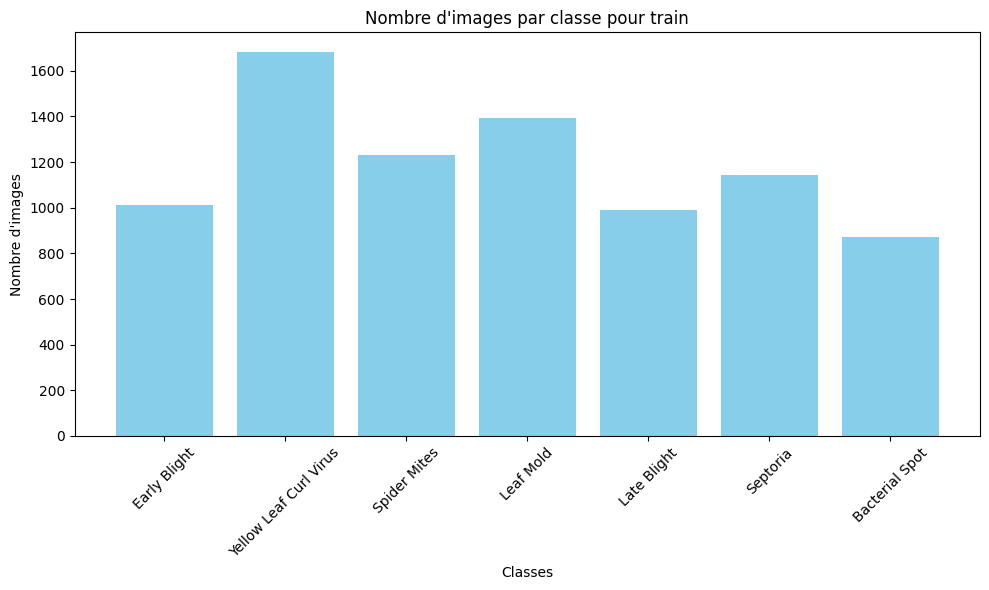

Checking annotations path: /kaggle/working/tomato-and-strawberry-3/valid/labels


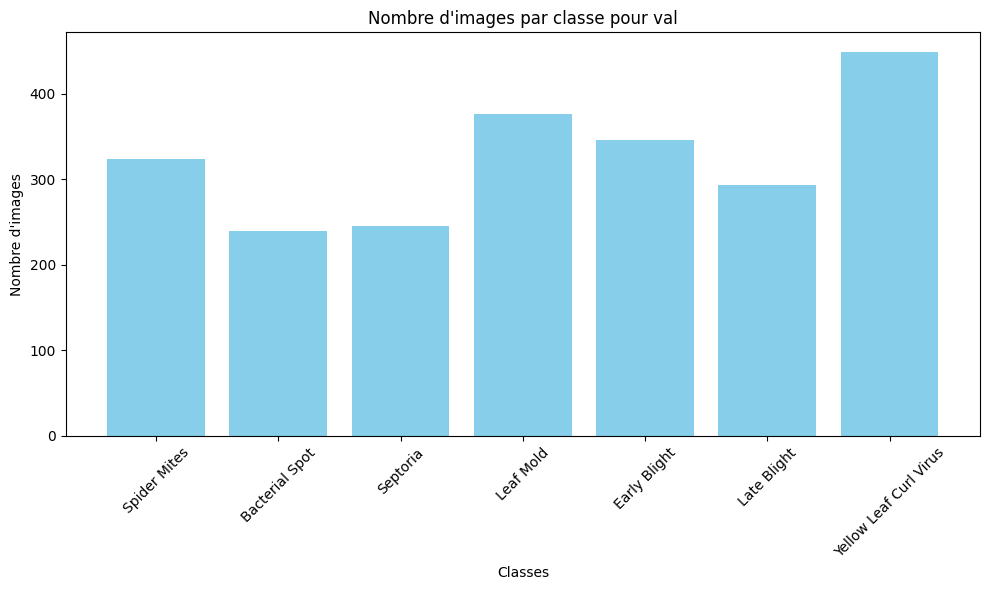

Checking annotations path: /kaggle/working/tomato-and-strawberry-3/test/labels


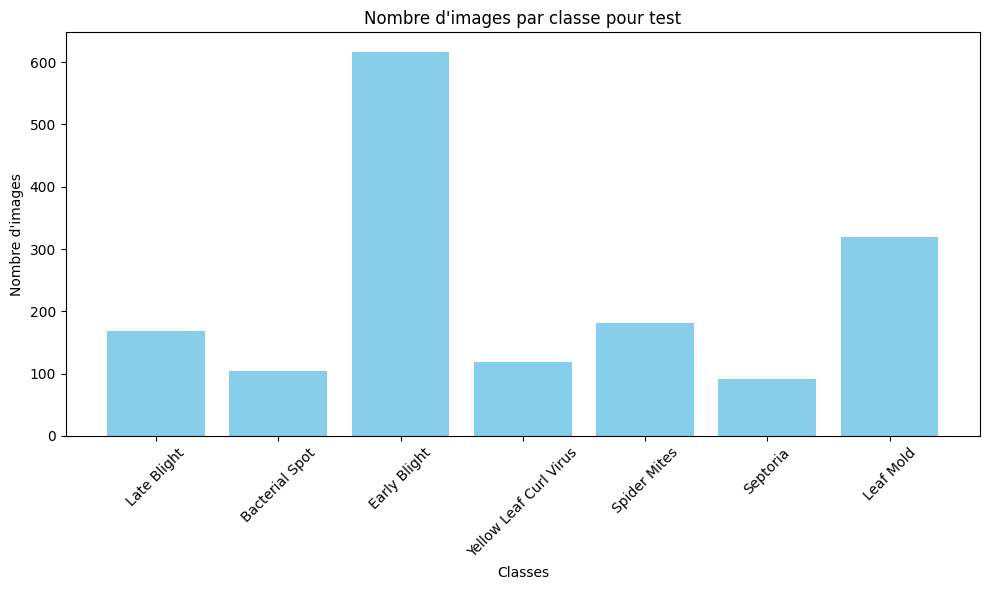

In [8]:
import os
import yaml
import matplotlib.pyplot as plt
from collections import defaultdict

# Lire le fichier data.yaml
yaml_path = '/kaggle/working/tomato-and-strawberry-3/data.yaml'
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Dictionnaire pour stocker les chemins de chaque set de données
sets = {
    'train': '/kaggle/working/tomato-and-strawberry-3/train/labels',
    'val': '/kaggle/working/tomato-and-strawberry-3/valid/labels',
    'test': '/kaggle/working/tomato-and-strawberry-3/test/labels'
}

# Lire les noms des classes à partir de data.yaml
class_names = data['names']

# Fonction pour parcourir et compter les classes dans un set de données
def count_classes_in_set(path):
    class_counts = defaultdict(int)
    annotations_path = path  # Utiliser directement le chemin donné
    print(f"Checking annotations path: {annotations_path}")
    if not os.path.exists(annotations_path):
        print(f"Path does not exist: {annotations_path}")
        return class_counts
    for annotation_file in os.listdir(annotations_path):
        if annotation_file.endswith(".txt"):  # Assurez-vous de lire uniquement les fichiers texte
            with open(os.path.join(annotations_path, annotation_file), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.split()[0])  # Le class_id est le premier élément de chaque ligne
                    class_counts[class_id] += 1
    return class_counts

# Fonction pour créer un graphique
def plot_class_distribution(class_counts, set_name):
    class_labels = [class_names[class_id] for class_id in class_counts.keys()]
    class_values = [count for count in class_counts.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(class_labels, class_values, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'images')
    plt.title(f'Nombre d\'images par classe pour {set_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Compter les classes et créer des graphiques pour chaque set de données
for set_name, set_path in sets.items():
    class_counts = count_classes_in_set(set_path)
    plot_class_distribution(class_counts, set_name)


In [9]:
from roboflow import Roboflow
from ultralytics import YOLO

In [10]:
model = YOLO("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 94.6MB/s]


In [ ]:
results = model.train(data="/kaggle/working/tomato-and-strawberry-3/data.yaml", translate=0, scale=0.1, erasing=0.1,epochs=70, imgsz=640,batch=16)


Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/tomato-and-strawberry-3/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 21.0MB/s]
2024-07-30 06:26:31,077	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-30 06:26:32,344	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/tomato-and-strawberry-3/train/labels... 5327 images, 121 backgrounds, 0 corrupt: 100%|██████████| 5327/5327 [00:04<00:00, 1254.92it/s]


train: New cache created: /kaggle/working/tomato-and-strawberry-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/tomato-and-strawberry-3/valid/labels... 1523 images, 35 backgrounds, 0 corrupt: 100%|██████████| 1523/1523 [00:01<00:00, 1112.01it/s]


val: New cache created: /kaggle/working/tomato-and-strawberry-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.37G       1.22      2.761      1.727         45        640: 100%|██████████| 333/333 [01:05<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.40it/s]


                   all       1523       2272       0.55      0.496      0.486        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.34G      1.197      1.943      1.669         83        640: 100%|██████████| 333/333 [01:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.16it/s]


                   all       1523       2272      0.605       0.53      0.539      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.33G      1.187      1.679      1.652         49        640: 100%|██████████| 333/333 [01:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.53it/s]

                   all       1523       2272      0.598      0.495      0.529      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.39G      1.179      1.563      1.642         40        640: 100%|██████████| 333/333 [01:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.54it/s]


                   all       1523       2272      0.759      0.568      0.655      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.33G      1.095      1.323      1.574         47        640: 100%|██████████| 333/333 [00:59<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.53it/s]


                   all       1523       2272      0.752      0.581      0.682      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.33G      1.072       1.26      1.559         39        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.47it/s]


                   all       1523       2272      0.829      0.607      0.717      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.33G      1.056      1.223      1.549         41        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.64it/s]


                   all       1523       2272      0.875      0.604       0.73      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.33G      1.041        1.2      1.532         51        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.70it/s]

                   all       1523       2272      0.818      0.619      0.729      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.33G      1.064      1.191      1.539         35        640: 100%|██████████| 333/333 [00:59<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.71it/s]

                   all       1523       2272      0.849      0.608      0.733      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70       2.4G      1.036      1.169       1.53         67        640: 100%|██████████| 333/333 [01:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.49it/s]


                   all       1523       2272      0.812      0.636      0.739      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.33G      1.037      1.126      1.513         39        640: 100%|██████████| 333/333 [01:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.52it/s]

                   all       1523       2272      0.863      0.605      0.736      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.33G      1.022      1.123      1.509         56        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
      16/70      2.33G      1.013       1.09      1.507         44        640: 100%|██████████| 333/333 [01:00<00:00,  5.54it/s]5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.74it/s]

                   all       1523       2272      0.861       0.65      0.768      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.39G          1      1.088      1.489         39        640: 100%|██████████| 333/333 [00:59<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.78it/s]

                   all       1523       2272      0.855      0.648      0.758      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.33G     0.9943      1.065      1.486         31        640: 100%|██████████| 333/333 [00:59<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.72it/s]


                   all       1523       2272      0.821      0.661       0.76      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.33G     0.9928      1.039      1.485         43        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.40it/s]

                   all       1523       2272      0.835      0.655      0.762      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.33G     0.9782      1.031      1.473         32        640: 100%|██████████| 333/333 [01:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.69it/s]

                   all       1523       2272      0.854      0.638       0.75      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.33G     0.9718      1.014      1.465         46        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.68it/s]

                   all       1523       2272      0.857      0.671      0.771       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.33G     0.9608     0.9859      1.463         43        640: 100%|██████████| 333/333 [00:59<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.78it/s]

                   all       1523       2272      0.835      0.666       0.77       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.33G     0.9623      1.007      1.465         39        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.70it/s]


                   all       1523       2272      0.867       0.67      0.781      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.33G     0.9451     0.9463      1.449         54        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.64it/s]

                   all       1523       2272      0.858      0.641      0.767      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.33G     0.9501      0.961      1.451         48        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.75it/s]


                   all       1523       2272      0.852      0.659      0.774      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.33G     0.9382     0.9529      1.442         44        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.72it/s]


                   all       1523       2272      0.854      0.674      0.778      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.38G     0.9447     0.9525      1.444         51        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.68it/s]

                   all       1523       2272      0.865      0.696      0.794      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.33G     0.9407     0.9393      1.442         35        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.79it/s]

                   all       1523       2272      0.859      0.697      0.797      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.33G     0.9284     0.9321      1.433         71        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.69it/s]


                   all       1523       2272      0.869      0.682      0.788      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.33G     0.9192     0.9094      1.429         40        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.59it/s]

                   all       1523       2272      0.886      0.688      0.797      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.33G     0.9258     0.9178      1.426         43        640: 100%|██████████| 333/333 [00:59<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.77it/s]

                   all       1523       2272       0.85      0.697      0.799      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.33G     0.9163      0.909      1.424         51        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.78it/s]

                   all       1523       2272      0.889      0.679      0.795      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.33G     0.8943     0.8769      1.415         45        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.62it/s]

                   all       1523       2272      0.871      0.694      0.803        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.32G     0.9079     0.8829      1.408         44        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.60it/s]

                   all       1523       2272      0.879      0.692      0.808      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.33G     0.8907     0.8686      1.408         35        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.75it/s]

                   all       1523       2272      0.873      0.703      0.806      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.32G     0.8866     0.8588      1.403         65        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.73it/s]

                   all       1523       2272      0.866      0.695      0.798      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.32G     0.8911     0.8413      1.402         34        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.73it/s]

                   all       1523       2272      0.854      0.723      0.799      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.32G     0.8809     0.8426      1.391         33        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.79it/s]

                   all       1523       2272      0.852      0.721      0.809      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.33G     0.8793     0.8437      1.397         42        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.62it/s]

                   all       1523       2272      0.862        0.7        0.8      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.32G     0.8627     0.8255      1.384         29        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.66it/s]

                   all       1523       2272      0.854      0.727      0.807      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.32G     0.8735     0.8246      1.385         60        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.73it/s]

                   all       1523       2272      0.861        0.7      0.802        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.32G     0.8523     0.7991      1.379         29        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.74it/s]

                   all       1523       2272      0.875      0.712      0.813      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.32G     0.8478     0.7781      1.372         32        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.64it/s]

                   all       1523       2272      0.846      0.739      0.814      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.32G     0.8496     0.7943      1.369         45        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.75it/s]

                   all       1523       2272      0.851       0.73      0.808      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.33G     0.8373     0.7698      1.366         34        640: 100%|██████████| 333/333 [00:59<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.77it/s]

                   all       1523       2272      0.852      0.734      0.817      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.32G     0.8461     0.7776      1.368         38        640: 100%|██████████| 333/333 [00:59<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.86it/s]

                   all       1523       2272      0.864      0.718      0.812      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.32G     0.8447     0.7833      1.356         32        640: 100%|██████████| 333/333 [00:59<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.78it/s]

                   all       1523       2272      0.852      0.725      0.807      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.32G     0.8297     0.7535      1.355         36        640: 100%|██████████| 333/333 [00:59<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.77it/s]

                   all       1523       2272      0.862      0.721        0.8       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.33G     0.8309      0.754      1.351         45        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.59it/s]

                   all       1523       2272      0.849      0.722      0.802      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.32G     0.8248     0.7533       1.35         50        640: 100%|██████████| 333/333 [00:59<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.79it/s]

                   all       1523       2272      0.876       0.73      0.806      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.32G     0.8202      0.741      1.347         38        640: 100%|██████████| 333/333 [00:59<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.85it/s]

                   all       1523       2272      0.855       0.73      0.808      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.38G       0.82     0.7412      1.342         35        640: 100%|██████████| 333/333 [00:59<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.81it/s]

                   all       1523       2272      0.852      0.733      0.809      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.33G     0.8191     0.7467      1.341         54        640: 100%|██████████| 333/333 [00:59<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.83it/s]

                   all       1523       2272      0.843      0.734      0.805      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.32G     0.7059     0.5514      1.295         28        640: 100%|██████████| 333/333 [01:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.65it/s]

                   all       1523       2272      0.861      0.734      0.802      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.33G     0.6712     0.5151      1.255         16        640: 100%|██████████| 333/333 [00:59<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.89it/s]

                   all       1523       2272      0.844      0.743      0.802      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.38G     0.6548     0.5029      1.241         16        640: 100%|██████████| 333/333 [00:59<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.83it/s]

                   all       1523       2272      0.847      0.738        0.8      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.32G     0.6414     0.4941      1.225         15        640: 100%|██████████| 333/333 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.91it/s]

                   all       1523       2272      0.844      0.736        0.8      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.32G     0.6323     0.4863      1.217         16        640: 100%|██████████| 333/333 [00:59<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.86it/s]

                   all       1523       2272      0.847       0.73      0.797      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.33G     0.6181      0.465      1.205         14        640: 100%|██████████| 333/333 [00:59<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.76it/s]

                   all       1523       2272      0.839      0.739      0.802      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.32G     0.6106     0.4721      1.199         25        640: 100%|██████████| 333/333 [00:59<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.62it/s]

                   all       1523       2272      0.866      0.733      0.802      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.32G     0.6052     0.4593      1.186         25        640: 100%|██████████| 333/333 [00:59<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.66it/s]

                   all       1523       2272      0.855      0.734      0.798      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.32G     0.5965     0.4569      1.184         16        640: 100%|██████████| 333/333 [00:59<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.87it/s]

                   all       1523       2272      0.855      0.733      0.798      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.33G      0.589     0.4456      1.177         16        640:  59%|█████▉    | 197/333 [00:35<00:23,  5.67it/s]


0: 480x640 1 Leaf Mold, 55.1ms
Speed: 1.8ms preprocess, 55.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


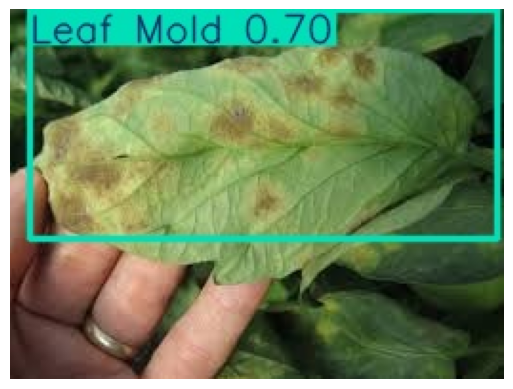

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Load a model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRPrslOwRy-VnsRixsduZ2YayzOshBdOGklpg&s"])  # return a https://images1.wionews.com/images/wion/900x1600/2023/11/24/1700817305294_pexelsmohammadibrahim13666672.jpglist of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs

    # Save the result to a file
    result.save("result.jpg")  # Specify filename directly

    # Load and display the saved image
    img = Image.open("result.jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [13]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Export the model to TFLite format
model.export(format="tflite")  # creates 'yolov8n_float32.tflite'




Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 218.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 253.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 231.1 MB/s eta 0:00:00

100%|██████████| 1.11M/1.11M [00:00<00:00, 31.9MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 50.10file/s]


ONNX: starting export with onnx 1.16.1 opset 17...


ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 1.5s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 155, Total Ops 410, % non-converted = 37.80 %
 * 155 ARITH ops

- arith.constant:  155 occurrences  (f32: 131, i32: 24)



  (f32: 8)
  (f32: 18)
  (f32: 64)
  (f32: 58)
  (f32: 3)
  (f32: 59)
  (f32: 7)
  (f32: 6)
  (f32: 2)
  (f32: 1)
  (f32: 20)
  (f32: 2)
  (f32: 4)
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 155, Total Ops 541, % non-converted = 28.65 %
 * 155 ARITH ops

- arith.constant:  155 occurrences  (f16: 131, i32: 24)



  (f32: 8)
  (f32: 18)
  (f32: 64)
  (f32: 131)
  (f32: 58)
  (f32: 3)
  (f32: 59)
  (f32: 7)
  (f32: 6)
  (f32: 2)
  (f32: 1)
  (f32: 20)
  (f32: 2)
  (f32: 4)


TensorFlow SavedModel: export success ✅ 47.7s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.15.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (49.4s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/tomato-and-strawberry-3/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite'